In [7]:
from astropy.table import Table
import numpy as np
from ltsfit.ltsfit import ltsfit
from matplotlib import pyplot as plt
import corner

In [8]:
# load the GGL data tables with different sky areas of lenses bu galaxy population is on 10 deg^2
sky_area = "50.0v2"
GGL_data_table = Table.read(f"../data/GGL_{sky_area}_SQDEG_RED_DEFLECTOR_BLUE_SOURCE.fits", format='fits')
GGL_data_table

lens_id,z_D,z_S,theta_E,sigma_v_D,stellar_mass_D,mag_S_i,mag_S_r,mag_S_g,mag_S_z,mag_S_y,mag_D_i,mag_D_r,mag_D_g,mag_D_z,mag_D_y,size_D,e1_mass_D,e2_mass_D,e_mass_D,gamma_pl,R_e_kpc,Sigma_half_Msun/pc2,surf_bri_mag/arcsec2
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64
0,1.1395730540197462,2.721757883923871,0.6383209474735921,234.52827079090258,408649665972.69635,25.933963738373834,26.127290551620234,26.254675998006924,25.877372770610663,25.77967242684352,22.98925557393261,24.057250718125182,25.178428704908463,22.13937039113474,21.469667400192904,0.5236284022464591,-0.2185177432823041,0.0403576488557333,0.22221328481968317,2,4.30707590221643,6033.914441400326,26.23568913352215
1,1.1676192009673254,2.838231941243875,0.5428598143754139,215.84729996869848,324309245490.47504,24.22762289989987,24.307252461915994,24.330966194829777,24.19614120355442,24.25840995562706,23.4402925996813,24.481996698219838,25.35590571629431,22.647451548717875,21.931126586377424,0.2833098895986966,0.01249637671998382,-0.11601750873715334,0.11668856741216427,2,2.339785570397245,9636.754519164577,25.086016539203026
2,0.8496635018062778,3.3535717429740073,0.641000768077548,198.8149905902349,252718868917.48575,25.559769535693853,25.692328159661358,26.0026527226674,25.435595481739007,25.34701222772341,21.96306329205506,22.827566278001065,23.54640956678392,21.2303460229086,20.962437814004915,0.23774477841756192,0.0316484729535937,0.16867423476209303,0.17161766608619294,2,1.820585794159507,9782.545548619119,22.86143073655398
3,1.5030247928909466,2.1037429248665225,0.5111993143704567,314.13299407421005,883777743495.4609,26.510924542753955,26.70858277146902,27.1583892110041,26.131180343134147,25.81278128068294,23.77862974498593,25.346268769963384,26.00807169213301,22.905058039418602,22.357811050847626,1.4659095665465913,-0.009356050373493305,-0.025632148189255435,0.027286309742933265,2,12.406290085901004,3755.908492949182,29.310824741747
4,0.09931798255962809,2.1700020122674757,0.8909096122755212,182.91937545558415,192914100798.88678,26.068800062516363,26.18260302373776,26.453438870162888,25.85431274554333,25.597538901622872,15.682406808159396,16.184348056972592,17.024734167739563,15.371562734687448,15.1519986272104,1.8882089102964354,-0.03149400430312179,0.020689174501004406,0.03768174954242524,2,3.4613724155333387,993.0878825186128,20.86717108100093
5,0.5288078808555957,4.343158907234654,1.8475198758908336,295.8237930636839,760108618473.295,26.489822086076952,26.713722342261637,27.968750435273822,26.51430656934446,26.36029223477607,18.820681063983304,19.673589738103377,20.940708005983755,18.453013637031862,18.219862227367084,1.3974704615046138,-0.037506289136146086,0.029683186537268865,0.04783109122496046,2,8.783981475448723,4329.28295528526,24.12990678858026
6,1.4559015868937206,3.8947692755843875,0.6865247003713678,244.97777562316497,462966940487.00793,26.6810933315858,26.722212903637512,27.36112014871479,26.47404290286856,26.398807903193074,24.046814542508628,25.29251052208788,25.617233245782813,23.347386960561984,22.7428989776878,0.3386182857665169,-0.03450844210644334,-0.04499833975555973,0.056706993901727315,2,2.862031469438829,11700.201951750312,25.745941106562977
7,0.2806689195320025,1.7410928677555793,0.702790233640981,178.45741656564877,176660221028.014,26.85810971732381,27.019893227146323,27.191141500680875,26.537720058873933,26.28112734684412,18.536060330766365,19.020192408396266,20.210660912850745,18.275044840954653,18.081439214360305,0.5836787330604735,-0.10351118102632655,-0.293874446056699,0.31157142783412706,2,2.481363853666704,2908.161559314505,21.745803937276175
8,0.7706303273274793,4.211551756362357,0.9218938814173087,225.27783876034175,365843003536.67883,26.207415223007033,26.463795844134502,27.56823350434354,26.10852487865217,25.982309600016222,21.08702338199977,22.261540879019485,23.52052383691099,20

In [22]:
lsst_10_yr_coadd_mag_depth_mask = ((GGL_data_table['mag_D_g'] < 27.4) & (GGL_data_table['mag_S_g'] < 27.4) &
                        (GGL_data_table['mag_D_r'] < 27.5) & (GGL_data_table['mag_S_r'] < 27.5) &
                        (GGL_data_table['mag_D_i'] < 26.8) & (GGL_data_table['mag_S_i'] < 26.8) &
                        (GGL_data_table['mag_D_z'] < 26.1) & (GGL_data_table['mag_S_z'] < 26.1) &
                        (GGL_data_table['mag_D_y'] < 24.9) & (GGL_data_table['mag_S_y'] < 24.9)
                        # (GGL_data_table['z_S'] < 1.5) # 4MOST limit
)

lsst_1_yr_coadd_mag_depth_mask = ((GGL_data_table['mag_D_g'] < 26.0) & (GGL_data_table['mag_S_g'] < 26.0) &
                        (GGL_data_table['mag_D_r'] < 25.7) & (GGL_data_table['mag_S_r'] < 25.7) &
                        (GGL_data_table['mag_D_i'] < 25.0) & (GGL_data_table['mag_S_i'] < 25.0) &
                        (GGL_data_table['mag_D_z'] < 24.3) & (GGL_data_table['mag_S_z'] < 24.3) &
                        (GGL_data_table['mag_D_y'] < 23.1) & (GGL_data_table['mag_S_y'] < 23.1)
                        # (GGL_data_table['z_S'] < 1.5) # 4MOST limit
)

lsst_4MOST_mag_depth_mask = (
                        (GGL_data_table['mag_D_r'] < 24) & (GGL_data_table['mag_S_r'] < 24) &
                        (GGL_data_table['z_S'] < 1.5) # 4MOST limit
)

print("Y1 # lenses:", np.sum(lsst_1_yr_coadd_mag_depth_mask)*20000/50)
print("Y10 # lenses:", np.sum(lsst_10_yr_coadd_mag_depth_mask)*20000/50)
print("4MOST # lenses:", np.sum(lsst_4MOST_mag_depth_mask)*20000/50)

Y1 # lenses: 50000.0
Y10 # lenses: 427600.0
4MOST # lenses: 15600.0


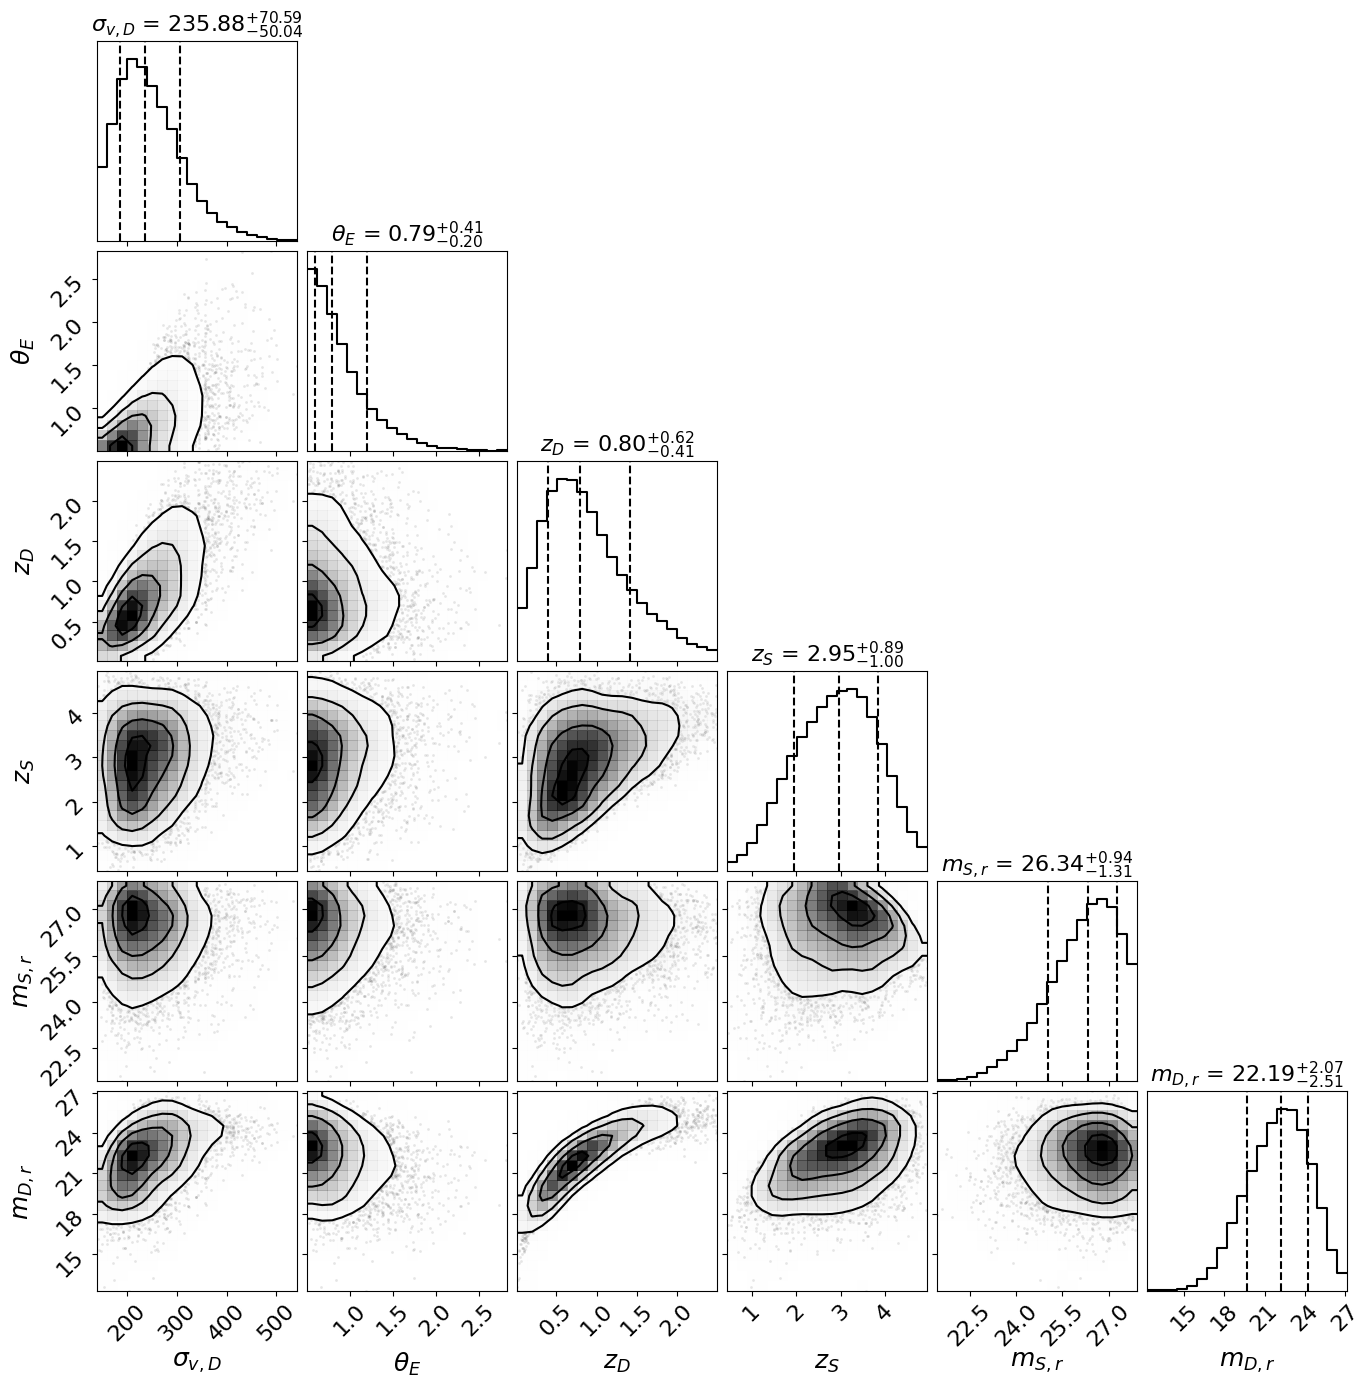

In [ ]:
keys = [
    'sigma_v_D',
    'theta_E',
    'z_D',
    'z_S',
    'mag_S_r',
    'mag_D_r',
    # 'e_mass_D',
]

latex_keys = [
    r"$\sigma_{v,D}$",
    r"$\theta_{E}$",
    r"$z_{D}$",
    r"$z_{S}$",
    r"$m_{S,r}$",
    r"$m_{D,r}$",
    # r"$\varepsilon_{D}$",
]

corner_data = GGL_data_table[][keys]
corner_data = np.array([corner_data[key] for key in keys]).T

# make a corner plot
fig = corner.corner(
    corner_data,
    labels=latex_keys,
    quantiles=[0.16, 0.5, 0.84],
    show_titles=True,
    smooth=True,
    smooth1d=True,
)

# make tick and label sizes larger
for ax in fig.get_axes():
    ax.tick_params(labelsize=16)
    ax.xaxis.label.set_size(18)
    ax.yaxis.label.set_size(18)

    # make title font size larger
    ax.title.set_fontsize(16)